## Data Collection
Building own synthetic dataset. 

Note: Boston Housing Dataset built into scikit-learn or a more detailed dataset from Kaggle can also be used

In [1]:
import pandas as pd
import numpy as np

# Create a synthetic dataset
np.random.seed(42)
num_samples = 1000

data = {
    'area': np.random.normal(1500, 500, num_samples).astype(int),
    'bedrooms': np.random.randint(1, 6, num_samples),
    'bathrooms': np.random.randint(1, 4, num_samples),
    'stories': np.random.randint(1, 3, num_samples),
    'mainroad': np.random.choice([0, 1], num_samples),
    'guestroom': np.random.choice([0, 1], num_samples),
    'basement': np.random.choice([0, 1], num_samples),
    'hotwaterheating': np.random.choice([0, 1], num_samples),
    'airconditioning': np.random.choice([0, 1], num_samples),
    'parking': np.random.randint(0, 3, num_samples),
    'prefarea': np.random.choice([0, 1], num_samples),
    'furnishingstatus': np.random.choice(['furnished', 'semi-furnished', 'unfurnished'], num_samples)
}

In [2]:
# Create price based on features with some noise
data['price'] = (
    data['area'] * 100 +
    data['bedrooms'] * 50000 +
    data['bathrooms'] * 30000 +
    data['stories'] * 40000 +
    data['mainroad'] * 30000 +
    data['guestroom'] * 15000 +
    data['basement'] * 10000 +
    data['hotwaterheating'] * 8000 +
    data['airconditioning'] * 25000 +
    data['parking'] * 20000 +
    data['prefarea'] * 35000 +
    np.random.normal(0, 50000, num_samples)
)

In [3]:
df = pd.DataFrame(data)

# Save to CSV for reproducibility
df.to_csv('./data/housing_data.csv', index=False)

## Exploratory Data Analysis (EDA)

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load data
df = pd.read_csv('./data/housing_data.csv')

# Basic info
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              1000 non-null   int64  
 1   bedrooms          1000 non-null   int64  
 2   bathrooms         1000 non-null   int64  
 3   stories           1000 non-null   int64  
 4   mainroad          1000 non-null   int64  
 5   guestroom         1000 non-null   int64  
 6   basement          1000 non-null   int64  
 7   hotwaterheating   1000 non-null   int64  
 8   airconditioning   1000 non-null   int64  
 9   parking           1000 non-null   int64  
 10  prefarea          1000 non-null   int64  
 11  furnishingstatus  1000 non-null   object 
 12  price             1000 non-null   float64
dtypes: float64(1), int64(11), object(1)
memory usage: 101.7+ KB
None
              area     bedrooms    bathrooms      stories     mainroad  \
count  1000.000000  1000.000000  1000.000000 

In [16]:
# Check for missing values
print(df.isnull().sum())

area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64


In [17]:
# Visualize distributions
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

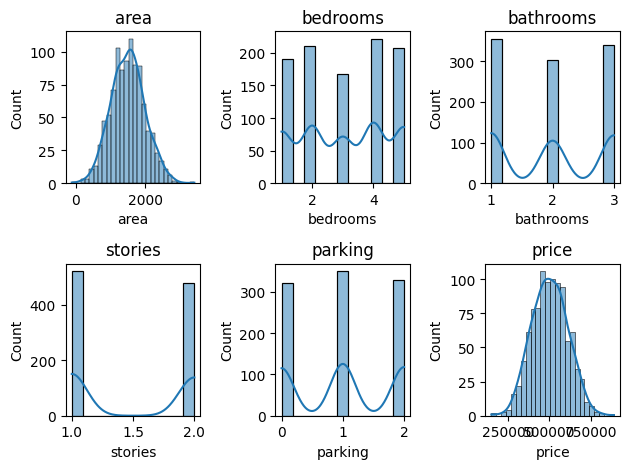

In [18]:
# Numerical features
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
for i, col in enumerate(num_features):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

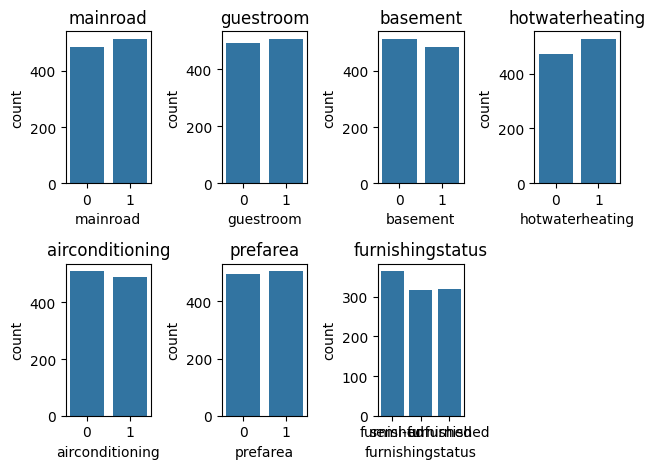

In [19]:
# Categorical features
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea', 'furnishingstatus']
for col in cat_features:
    plt.subplot(2, 4, cat_features.index(col)+1)
    sns.countplot(x=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

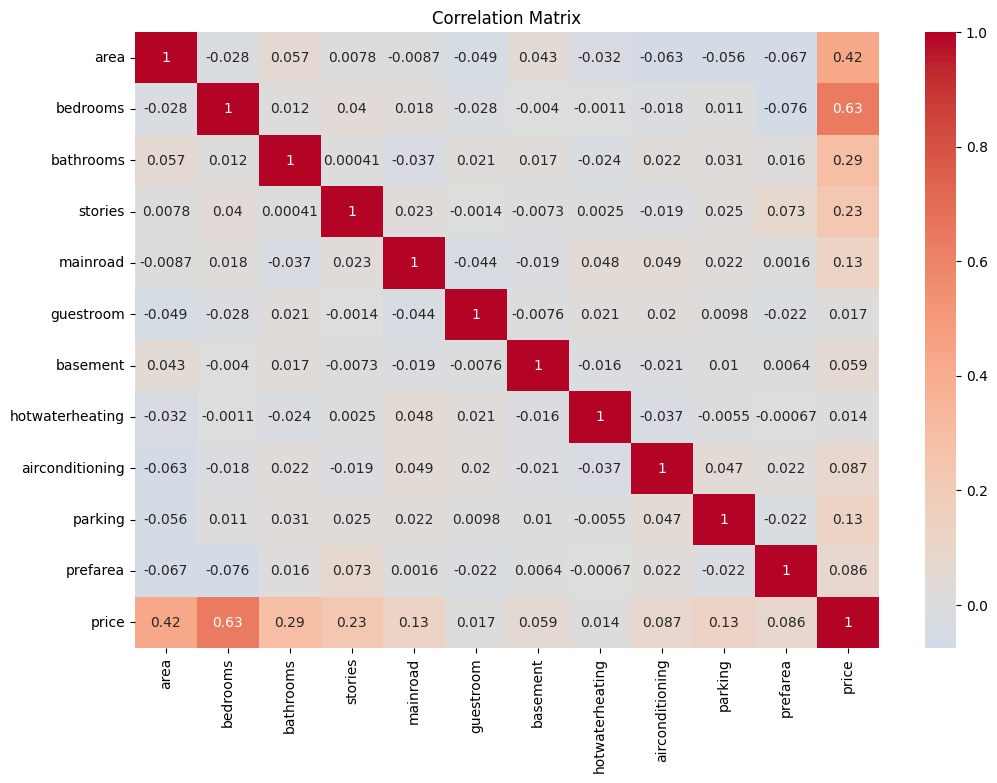

In [22]:
# Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

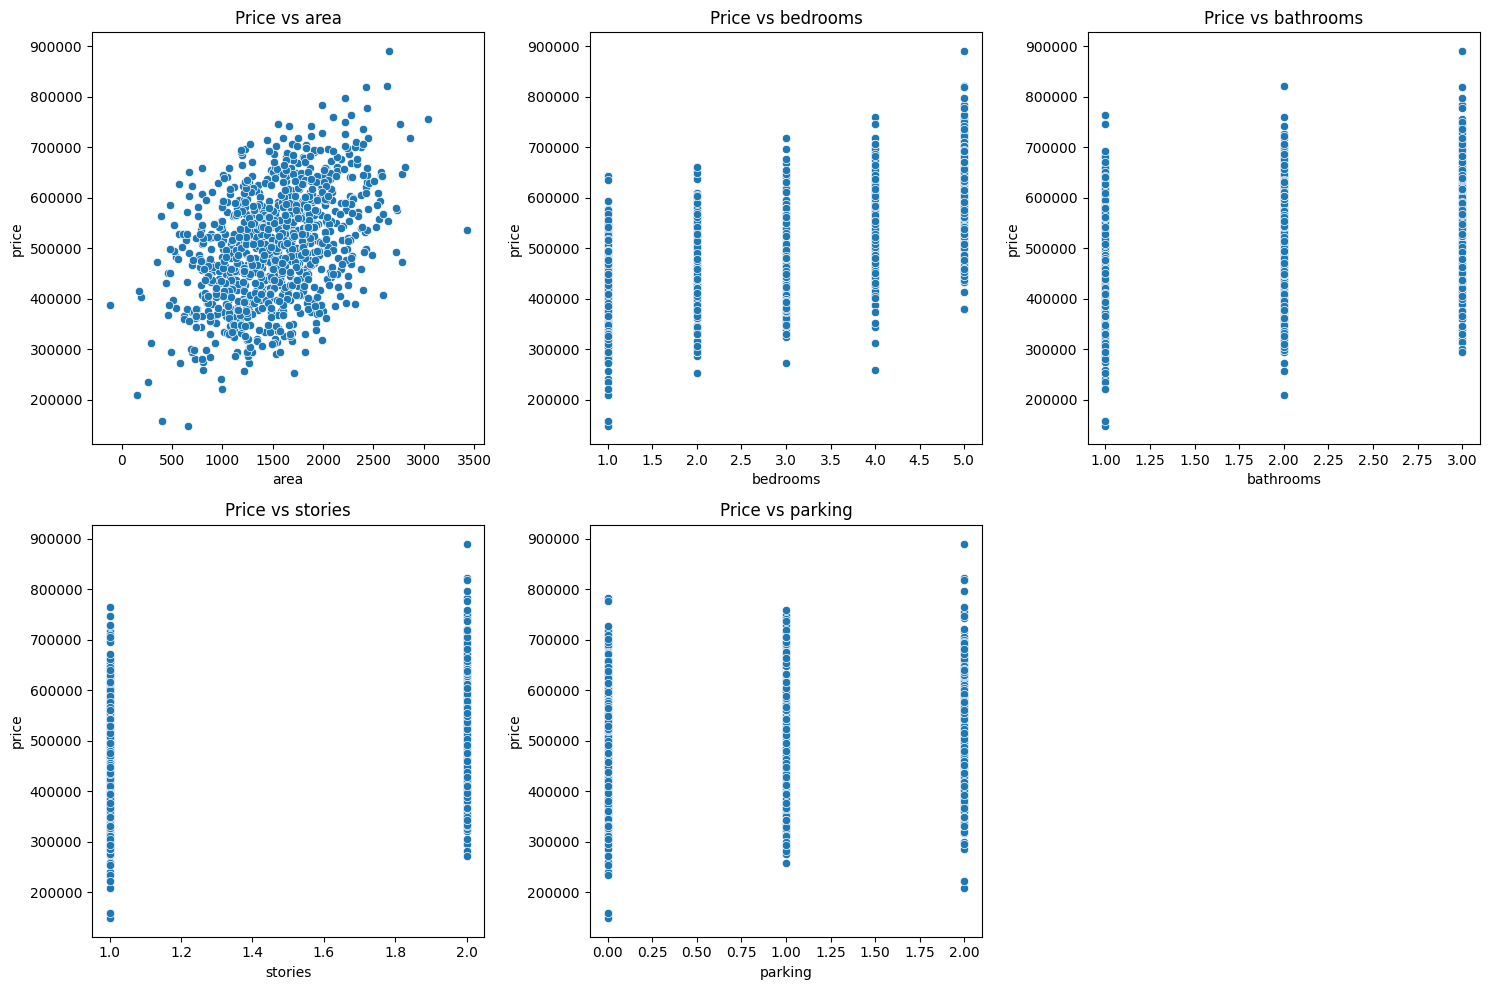

In [23]:
# Price vs key features
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features[:-1]):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=col, y='price', data=df)
    plt.title(f'Price vs {col}')
plt.tight_layout()
plt.show()

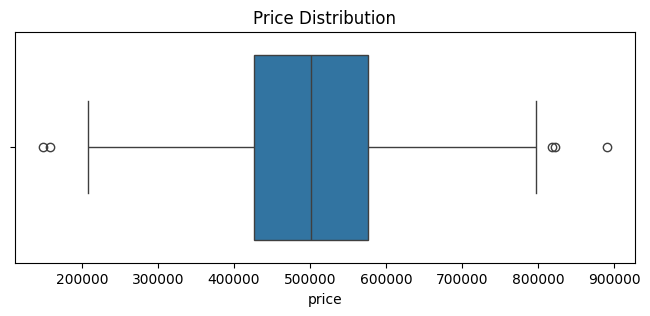

In [27]:
#Outlier detection

plt.figure(figsize=(8, 3))
sns.boxplot(x='price', data=df)
plt.title('Price Distribution')
plt.show()

## Data Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

In [29]:
# Define numerical and categorical features
num_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
cat_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
               'airconditioning', 'prefarea', 'furnishingstatus']

In [31]:
# Create preprocessing pipeline
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

In [32]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Preprocess the data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

## Model Building

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train model
sklearn_model = LinearRegression()
sklearn_model.fit(X_train_processed, y_train)

LinearRegression()

In [35]:
# Make predictions
y_pred_train = sklearn_model.predict(X_train_processed)
y_pred_test = sklearn_model.predict(X_test_processed)

In [36]:
# Evaluate model
def evaluate_model(y_true, y_pred, label):
    print(f"\n{label} Evaluation:")
    print(f"R2 Score: {r2_score(y_true, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")

evaluate_model(y_train, y_pred_train, "Training")
evaluate_model(y_test, y_pred_test, "Test")


Training Evaluation:
R2 Score: 0.7853
MAE: 40412.88
MSE: 2568008667.94
RMSE: 50675.52

Test Evaluation:
R2 Score: 0.7433
MAE: 43566.50
MSE: 2777547762.46
RMSE: 52702.45


### Evaluation Insights

- R2 Score (R-squared) - The proportion of variance in the dependent variable (price) that's predictable from the independent variables. Value ranges from 0 to 1 (or 0% to 100%). Higher is better (1 is perfect prediction).
    - 0.7853 indicates my model captures 78.53% of what drives house prices in this data

- MAE (Mean Absolute Error) - Average absolute difference between predicted and actual prices. Measured in the same units as your target variable. Lower is better.
    - 40412.88 indicates that through this model, we could be off by $40412.88 in either side.

- MSE (Mean Squared Error) - Average squared difference between predicted and actual i.e average((actual - predicted)^2). Useful for optimization (gradient descent). Lower is better.

- RMSE (Root Mean Squared Error) - Square root of MSE. It puts error back in original units. Lower is better. RMSE > MAE indicates some predictions are significantly off.
    - 50675.52 means that even though our average error id 504012.88, some predictions are much further off upto 50675.52

How to improve - 
- If MAE/RMSE are too high:
    - Add more relevant features (school quality, crime rates)
    - Handle outliers better
    - Try more complex models (if linearity assumption doesn't hold)

- If R2 is low:
    - Check for missing important features
    - Examine multicollinearity
    - Verify linear relationship assumptions

Summary - 

"Model achieved 78.53% explanatory power (R2) with average prediction error under $40412.88, demonstrating strong ability to capture housing market dynamics. The close match between training and test scores indicates good generalization."

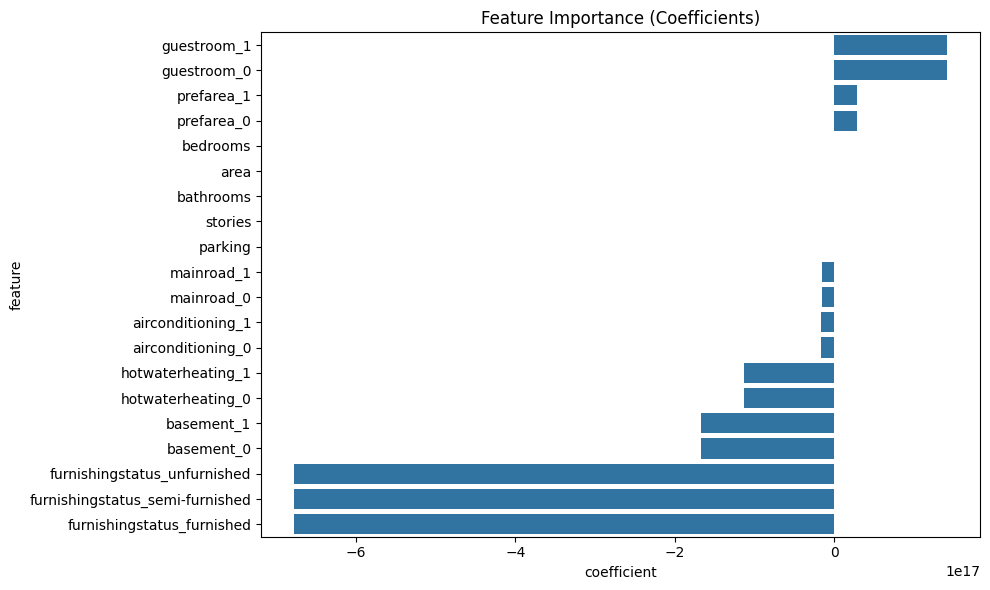

In [41]:
# Feature importance (for standardized features)
feature_names = num_features + list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features))
coefficients = pd.DataFrame({
    'feature': feature_names,
    'coefficient': sklearn_model.coef_
}).sort_values('coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coefficient', y='feature', data=coefficients)
plt.title('Feature Importance (Coefficients)')
plt.tight_layout()
plt.show()

## Key Insights

In [ ]:
print(f"Model Coefficients: {coefficients}")

print("\nInterpretation Examples:")
print("- Each additional bedroom increases price by approximately $", 
      coefficients[coefficients['feature'] == 'bedrooms']['coefficient'].values[0] * df['price'].std())
print("- Having a mainroad increases price by approximately $", 
      coefficients[coefficients['feature'] == 'mainroad_1']['coefficient'].values[0] * df['price'].std())

Model Coefficients:                             feature   coefficient
8                       guestroom_1  1.422345e+17
7                       guestroom_0  1.422345e+17
16                       prefarea_1  2.931327e+16
15                       prefarea_0  2.931327e+16
1                          bedrooms  7.017605e+04
0                              area  5.008463e+04
2                         bathrooms  2.817586e+04
3                           stories  2.081758e+04
4                           parking  1.554681e+04
6                        mainroad_1 -1.465142e+16
5                        mainroad_0 -1.465142e+16
14                airconditioning_1 -1.614316e+16
13                airconditioning_0 -1.614316e+16
12                hotwaterheating_1 -1.130992e+17
11                hotwaterheating_0 -1.130992e+17
10                       basement_1 -1.664903e+17
9                        basement_0 -1.664903e+17
19     furnishingstatus_unfurnished -6.782843e+17
18  furnishingstatus_semi-furn

## Save Model and Preprocesser for Model Deployment

In [ ]:
import pickle

# Save the sklearn model and preprocessor
with open('model.pkl', 'wb') as f:
    pickle.dump(sklearn_model, f)
    
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)


In [ ]:
# Also save the column names for reference
import json
with open('feature_names.json', 'w') as f:
    json.dump(feature_names, f)